# **Hands-On Machine Learning Project**
## **Topic 20: Credit Data**
### Florian Korn, Vincent Bläske, Dennis Götz

***
# **Table of Content**
**[IV. Data Preparation](#data_prep)**<br>
***

## **IV. Data Preparation** <a id='data_prep'></a>
**[1. Data Cleaning](#clean)**<br>
**[2. Feature Selection](#select)**<br>
**[3. Feature Scaling](#scale)**<br>
***

### **Import of librariers:**

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns


### **Load stored data:**

In [3]:
%store -r attributes
%store -r cat_attribs
%store -r dict_ordinal_map
%store -r data_values

***
### **1. Data Cleaning** <a id='clean'></a> <br> 
Check for null values:

In [4]:
# Check for null values
is_null_check = pd.DataFrame(data_values.isnull().sum())
is_null_check[is_null_check[0] > 0]

,0


Encoding:

In [5]:
data_encoded = data_values.copy()
categories_order = [i for i in dict_ordinal_map.values()]
ordinal_encoder = OrdinalEncoder(categories=categories_order, dtype='int')
data_encoded[cat_attribs] = ordinal_encoder.fit_transform(data_values[cat_attribs])
data_encoded.head(3)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Credit rating
0,1,6,4,3,1169,0,4,4,0,0,...,3,67,0,2,2,2,1,0,0,0
1,2,48,2,3,5951,1,2,2,3,0,...,3,22,0,2,1,2,1,1,0,1
2,0,12,4,6,2096,1,3,2,0,0,...,3,49,0,2,1,1,2,1,0,0


### **2. Feature Selection** <a id='select'></a>
Decisions to include feature for the model training were made based on the [Data_Understanding](./Data_Understanding.ipynb) feature analysis and correlation, as well semantic meaningfull and in regards to unbiased Machine Learning models. Some features are not that different in patterns for itself but can influence a model in combination with other features. Therefore we included them so that the Machine Learning Models decide for themselves which features to include and which not.

* **Status of existing checking account**
    - **Include** this feature
        -  We see patterns in the data (see [Data_Understanding](./Data_Understanding.ipynb)) 
        - It has the secound highest correlation
    - Good credit ratings are seven times more likely to have no checking account with us
    - The categories <200 DM habe a high probability (<0 DM: 69 % and 0 - 200 DM: 60 %) to be marked as bad credit rating
    - Contrary to our thoughts it is not determining for the credit rating if we know the customer because of a checking account.

* **Duration in month** <br>
    * **Include** this feature
        - we see differences between short and long durations 
        - A closer look at "credit amount" and "duration in month" reveal for some durations patterns, for others no big difference.<br>

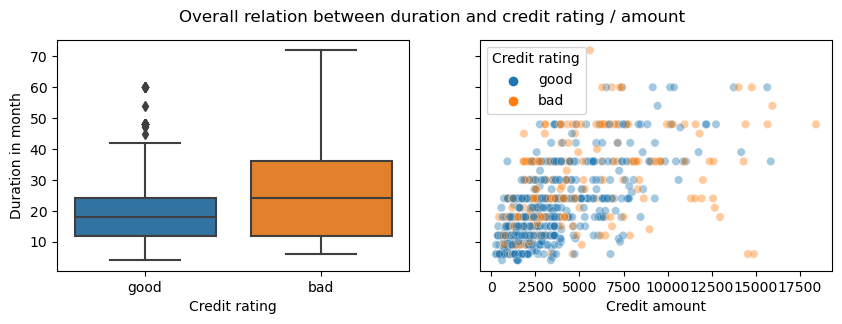

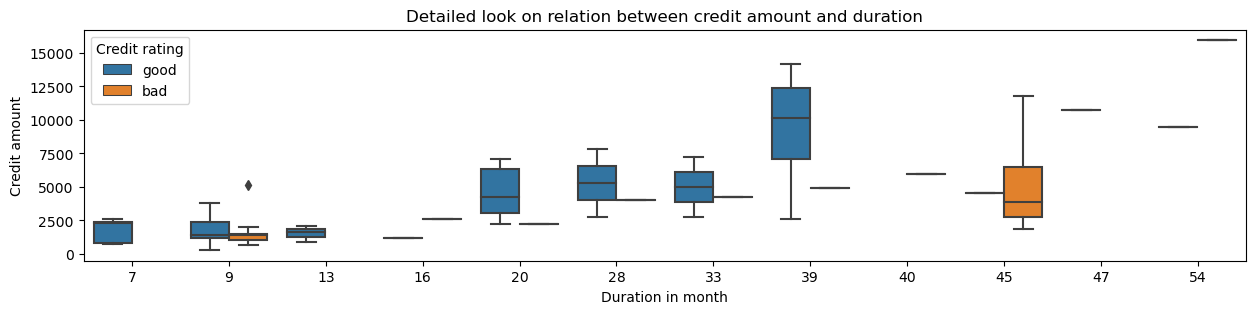

In [6]:
fig, ax = plt.subplots(1,2, figsize = (10,3), sharey = True)
fig.suptitle('Overall relation between duration and credit rating / amount')
sns.boxplot(ax = ax[0], x = data_values['Credit rating'], y = data_values['Duration in month'])
sns.scatterplot(ax = ax[1], x = data_values['Credit amount'], y = data_values['Duration in month'], hue = data_values['Credit rating'], alpha = 0.4)
plt.figure(figsize = (15,3))
sns.boxplot(data_values[data_values['Duration in month'].isin([7,9,13,16,20,39,33,40,45,54,47,28])], x = 'Duration in month', y = 'Credit amount', hue = 'Credit rating')
plt.title('Detailed look on relation between credit amount and duration')
plt.show()

* **Credit History** <br>
This feature should be **included** as we see differences between good and bad credit ratings in relation to credit history. Good credit ratings have often existing credits or are a critical account. A equal likelihood for a good and bad credit is for existing credits paid back duly and dely in paying off. The worst likelihood for bad credit ratings has no credits taken and all paid back dully. This can be because of the representation of the category existing credits paid back duly in the data. It would be better to have here equal classes.

* **Purpose** <br>
We see there systematic patterns as good credit ratings have often the purpose to retrain, buy a used car or radio / tv. Only looking at the bad credit ratings, they are mostly for new cars. In relation to the credit amount we see that good credits had low credit amounts for radio / tv. For the purpose education, car (used), business and others we see that high amounts lead more likely to bad credit ratings. We would **include** this feature because of the patterns. Also here the overall distribution would be better if equally represented.

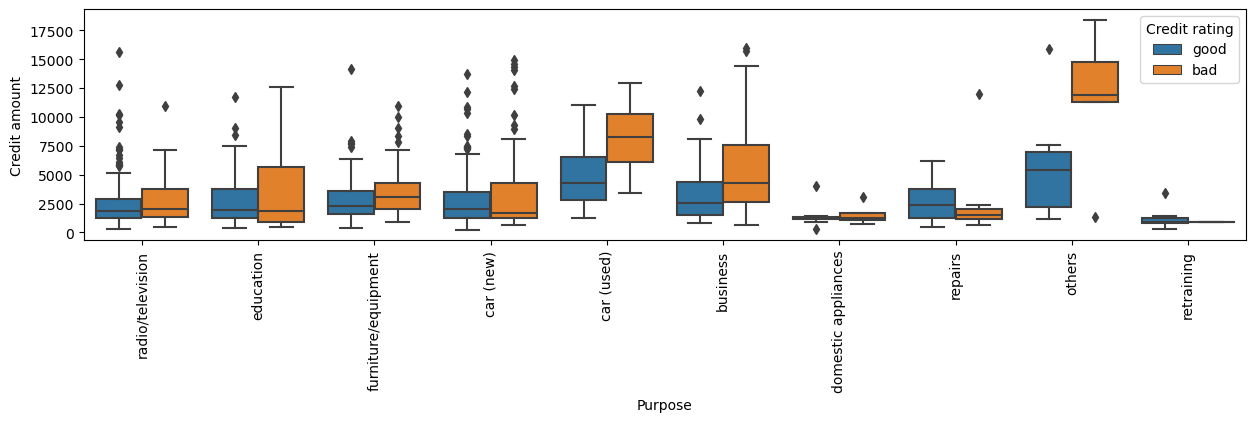

In [7]:
plt.figure(figsize = (15,3))
sns.boxplot(y = data_values['Credit amount'], x = data_values['Purpose'], hue = data_values['Credit rating']).set_xticklabels(data_values['Purpose'].unique(), rotation = 90)
plt.show()

* **Credit Amount** <br>
Here we see that mostly amounts between 1.500 and 3.750 lead to good credit ratings and amounts between 1.500 to 5.000 to bad credit ratings. There is a soft pattern. But as we have seen in previous feature selections that the amount corresponds with purpose and duration. Therefore it should be included.

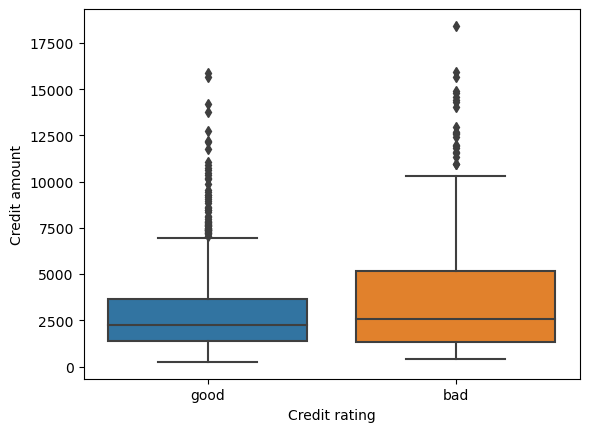

In [8]:
sns.boxplot(x = data_values['Credit rating'], y = data_values['Credit amount'])
plt.show()

## **Savings account/bonds** <br>
This feature doesn't seem to provide a lot of systematic patterns. The only big differences is absolut to unknown savings / no savings and < 100 DM. But they have the same distribution as it seems graphically. The boxplots look similar. We would rather not deploy this feature, but we will see later in the selection process (forward / backward selection).

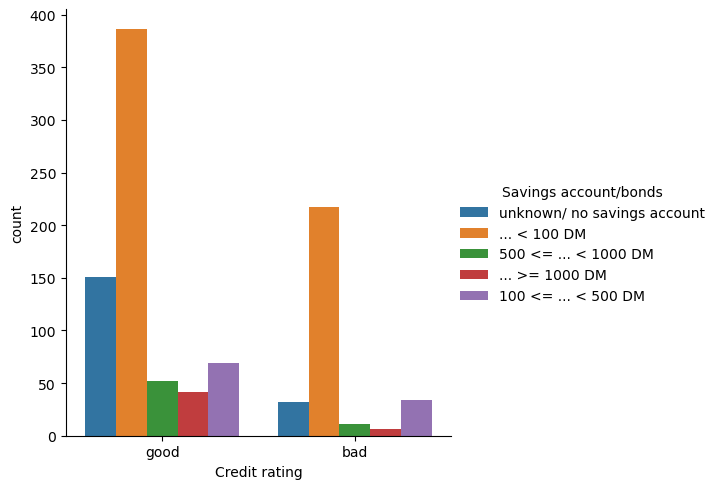

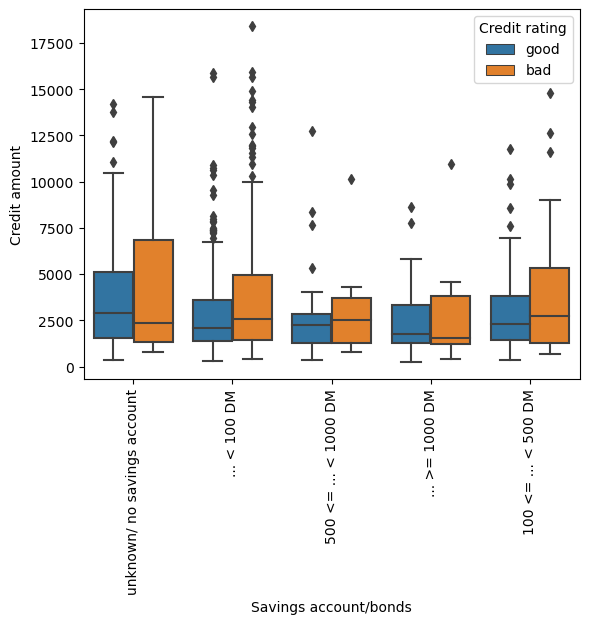

In [9]:
sns.catplot(data = data_values, x="Credit rating", hue="Savings account/bonds", kind="count")
plt.show()
sns.boxplot(y = data_values['Credit amount'], x = data_values['Savings account/bonds'], hue = data_values['Credit rating']).set_xticklabels(data_values['Savings account/bonds'].unique(), rotation = 90)
plt.show()

## **Present employment since** <br>
We see that 1 - 4 years of employment leads with a high likelihood to good credit ratings. But we also see in the group of bad credit ratings that 1 - 4 years of employment have often no saving accounts which leads in the bad credit rating group to the highest absolut amount. We would include this feature as it has different systematic patterns and differs with other features to more specific insights.

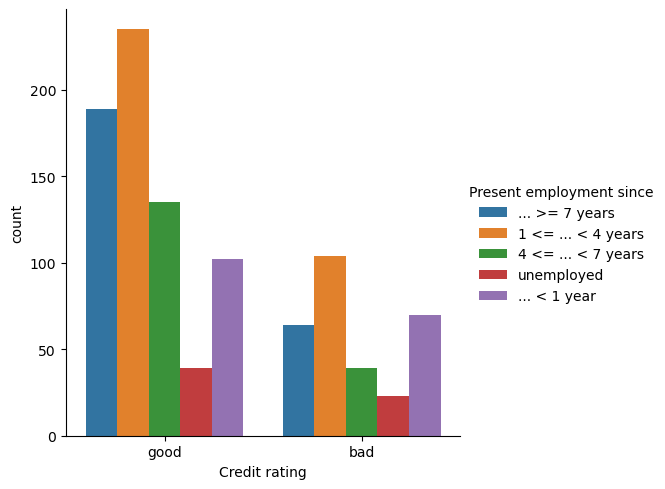

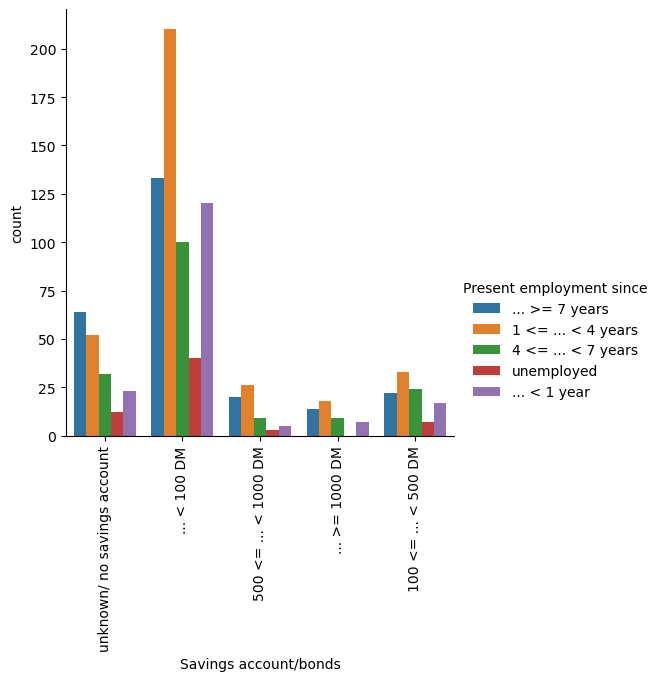

In [10]:
sns.catplot(data = data_values, x="Credit rating", hue="Present employment since", kind="count")
plt.show()
sns.catplot(data = data_values, x='Savings account/bonds', hue="Present employment since", kind="count").set_xticklabels(data_values['Savings account/bonds'].unique(), rotation = 90)
plt.show()

## **Installment rate in percentage of disposable income**
This feature doesn't show us much systematic patterns. We see that mostly 4 % installment rate leads to good or bad credit rating. The distribution seems somehow similar inbetween the categories. Therefore we would rather not include this feature. But the statistical significance can also be determined by the forward / backward selection.

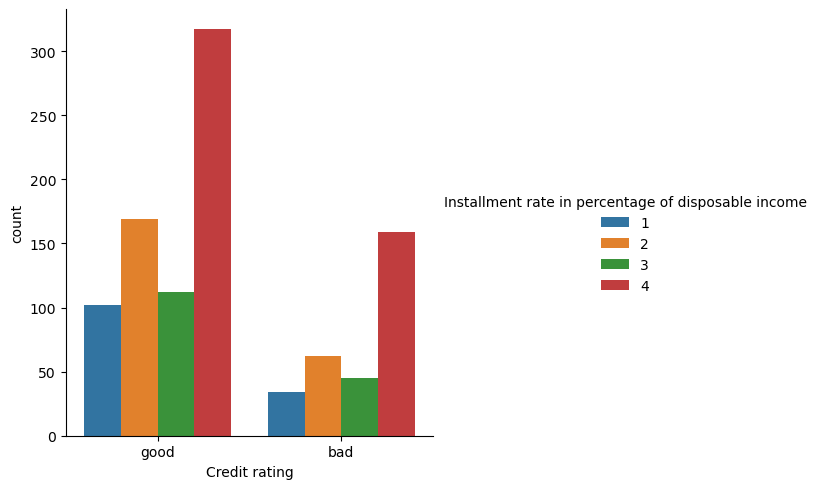

In [11]:
sns.catplot(data = data_values, x="Credit rating", hue="Installment rate in percentage of disposable income", kind="count")
plt.show()

## **Personal status and sex**
We see that single males are more likely to get a good credit rating. Between divorced / seperated / married female it doesn't differ that much (between good and bad credit rating). This feature could give us something but there could be a bias in the data, as we don't have single or widowed females in the data. Our ML model would learn to mostly give a good credit rating to single male's. Also the categories seem differently build (female has divorce, separated and married togheter, male only divorce and seperated). Therefore we don't include this feature.

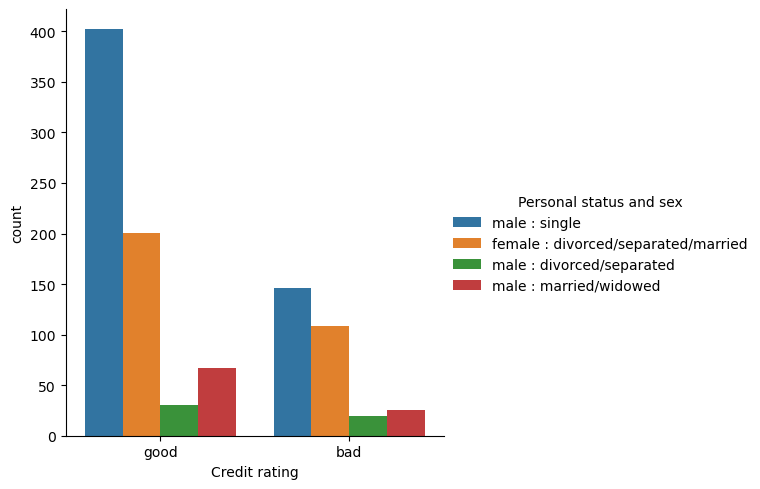

In [12]:
sns.catplot(data = data_values, x="Credit rating", hue="Personal status and sex", kind="count")
plt.show()

## **Other debtors / guarantors**
Contrary to our believes, it is more likely to get a good credit rating if we don't have debtors / guarantors. This could be because of the process obtaining a credit. If you don't need a guarantor or co-applicant than the bank demands a lot of solvency of the customer. Therefore this is more likely absolut. We think there is little explanatory value in this feature to include it in a ML model. But we would like to see how the forward / backward selection see the statistic significance.

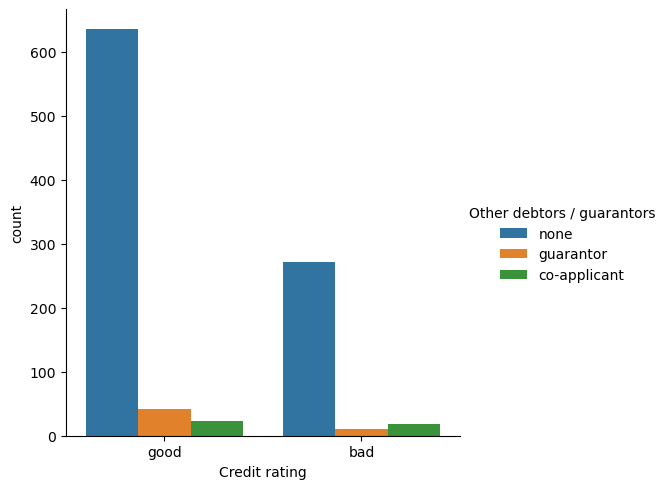

In [13]:
sns.catplot(data = data_values, x="Credit rating", hue="Other debtors / guarantors", kind="count")
plt.show()

## **Present residence since**
The variable for itself doesn't give us much explanatory value. It has approximately the same distribution between good and bad credit rating. Also with other features there don't are systematic patterns to work with. We would rather not include this feature.

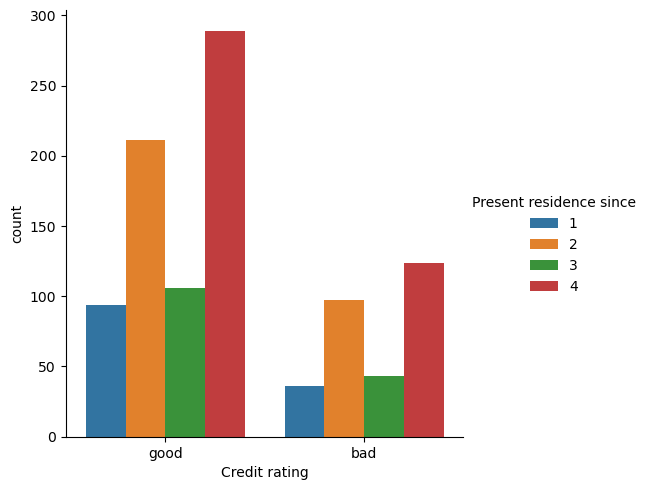

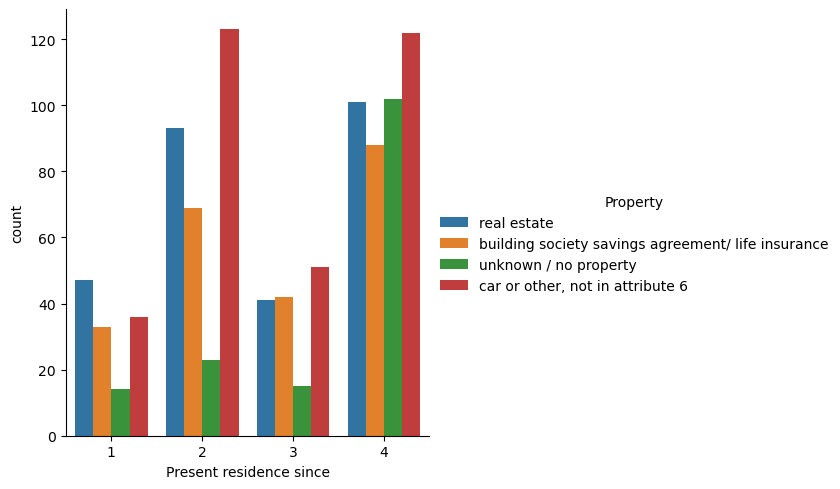

In [14]:
sns.catplot(data = data_values, x="Credit rating", hue="Present residence since", kind="count")
plt.show()
sns.catplot(data = data_values, x="Present residence since", hue="Property", kind="count")
plt.show()

## **Property**
We don't see there much difference for good or bad credit rating if you sleep in a car, unknown or no property, real estate. So you could sleep in a car but also have a good credit rating. We would not include this feature.

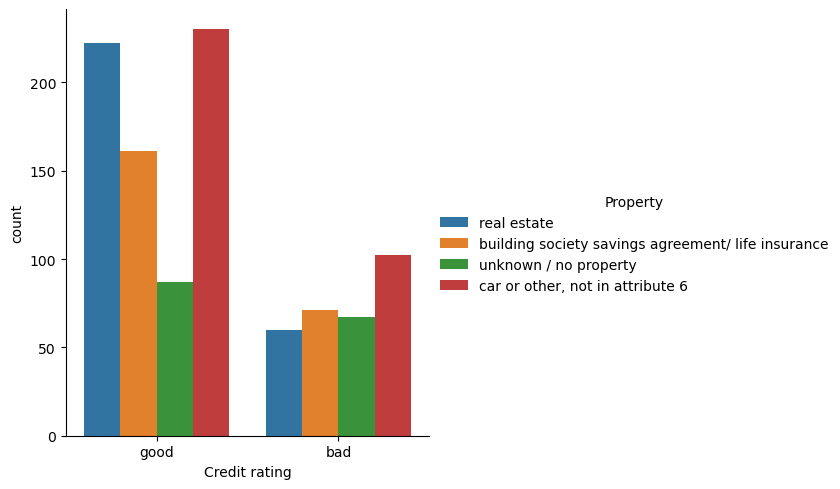

In [15]:
sns.catplot(data = data_values, x="Credit rating", hue="Property", kind="count")
plt.show()

## **Age in years**
There is no big difference between good and bad credit ratings regarding the age of the customer. This feature will not have much explanatory value of the ML model. But we will see it in the backward / forward regression how it will perform (it should not be included in the model). This is totally contrary to our believes.

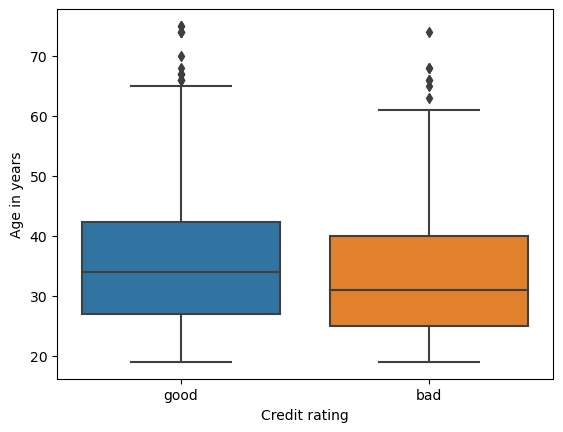

In [16]:
sns.boxplot(x = data_values['Credit rating'], y = data_values['Age in years'])
plt.show()

## **Other installment plans**
There shouldn't be much explanatory value of this feature for our ML model, as the bank and stores absolut amount a similar. Only none is different between good and bad credit rating. We would rather not include it, but see how the forward / backward regression advocates for this.

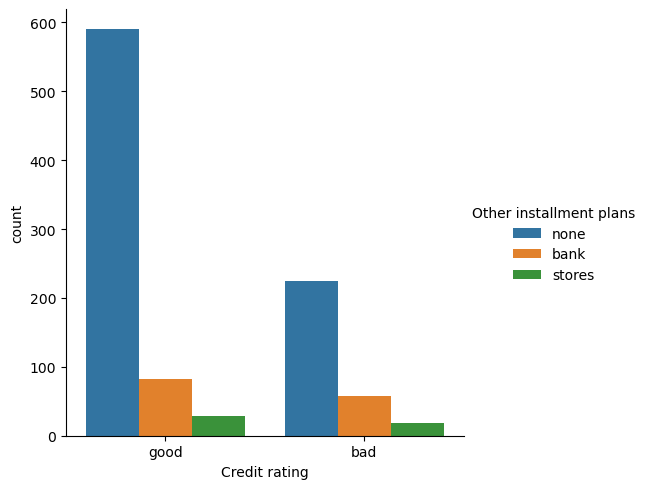

In [17]:
sns.catplot(data = data_values, x="Credit rating", hue="Other installment plans", kind="count")
plt.show()

## **Housing**
Here it is only a difference if you own a house or not for the credit rating. We would like to include it but also think there won't be much explanatory value. Let's see how backward / forward regression handels this.

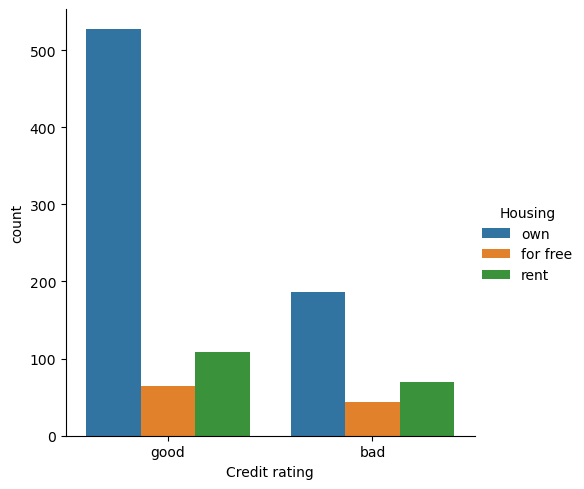

In [18]:
sns.catplot(data = data_values, x="Credit rating", hue="Housing", kind="count")
plt.show()

## **Number of existing credits at this bank**
The distribution looks similar, only the absolut values are different and we don't think there is much explanatory value. We would rather exclude this feature but see how forward / backward regression handels this feature.

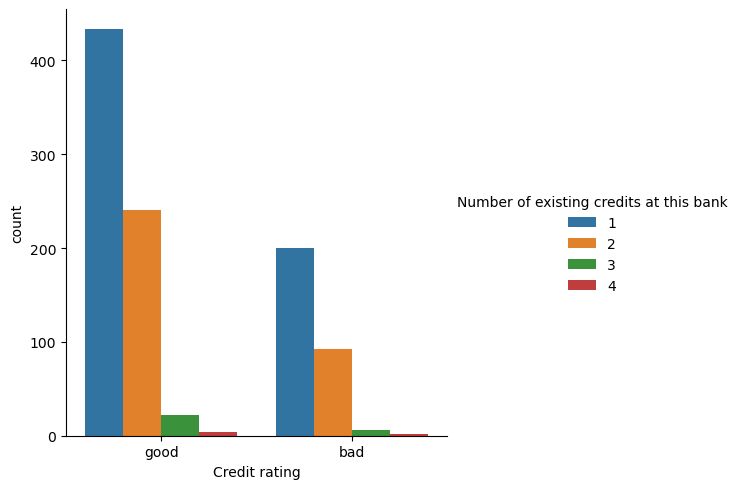

In [19]:
sns.catplot(data = data_values, x="Credit rating", hue="Number of existing credits at this bank", kind="count")
plt.show()

## **Job**
Only more skilled employee got a good credit rating than a bad one. But it seems similar distributed and shouldn't give us much explanatory value. We would rather not include it but let the forward /backward regression decide.

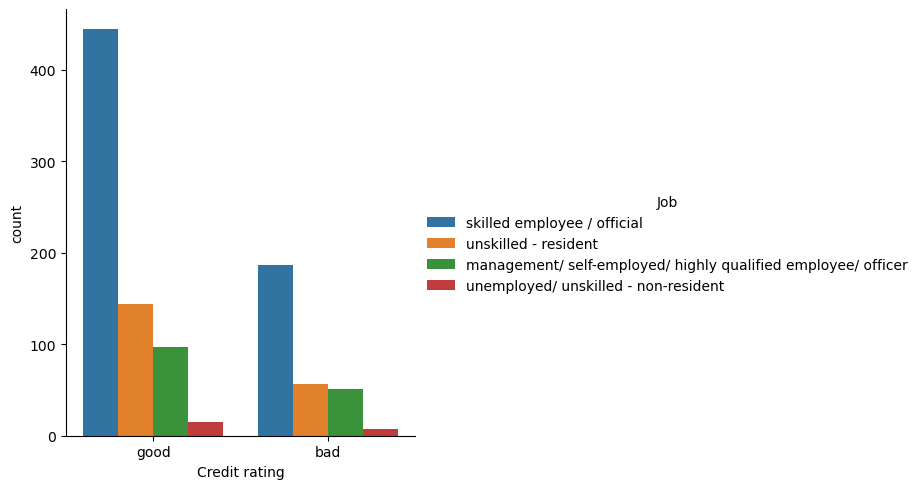

In [20]:
sns.catplot(data = data_values, x="Credit rating", hue="Job", kind="count")
plt.show()

## **Number of people being liable to provide maintenance for**
This also doesn't seem for itself to have much explanatory value. We would rather not include it but let the forward /backward regression decide.

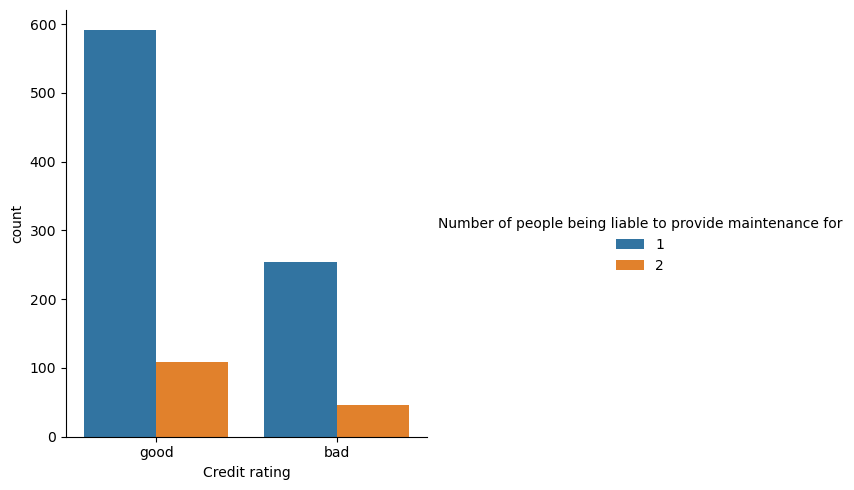

In [21]:
sns.catplot(data = data_values, x="Credit rating", hue="Number of people being liable to provide maintenance for", kind="count")
plt.show()

## **Telephone**
This also doesn't seem for itself to have much explanatory value. We would rather not include it but let the forward /backward regression decide.

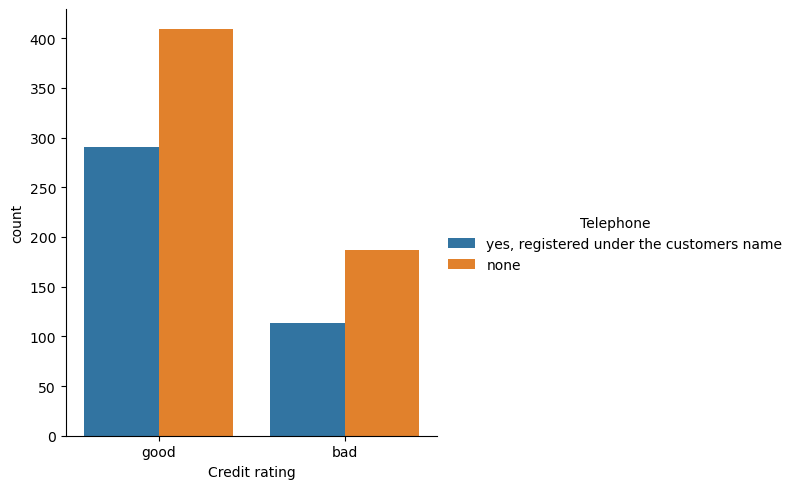

In [22]:
sns.catplot(data = data_values, x="Credit rating", hue="Telephone", kind="count")
plt.show()

## **Foreign Worker**
This also doesn't seem for itself to have much explanatory value. We don't include it. There is no systematic pattern and we shouldn't bias the ML model on racial aspects.

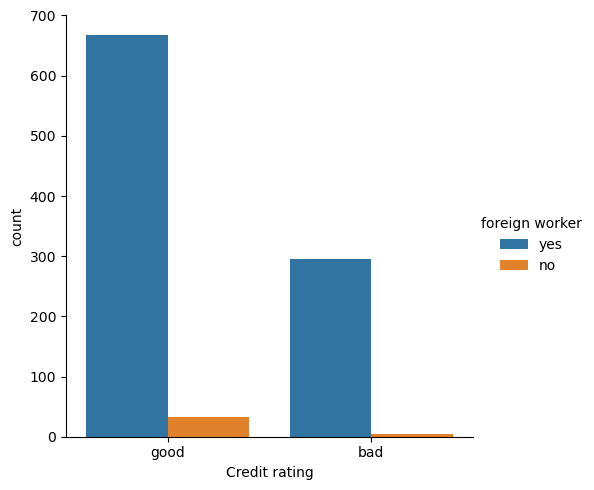

In [23]:
sns.catplot(data = data_values, x="Credit rating", hue="foreign worker", kind="count")
plt.show()

In [27]:
# Handling all the ordinal categorical attributes
data_ord = data_values[cat_attribs]
categories_order = [i for i in dict_ordinal_map.values()]
ordinal_encoder = OrdinalEncoder(categories=categories_order, dtype='int')
data_ord_encoded = ordinal_encoder.fit_transform(data_ord)

# Replace the categories by numbers
data_encoded = data_values.copy()
data_encoded[cat_attribs] = data_ord_encoded

# Create a Test Set
train_set, test_set = train_test_split(data_encoded, train_size=0.8, random_state=0, stratify=data_values['Credit rating'])

# Separate features and target values in train and test set
X_train = np.array(train_set.iloc[:, :-1])
y_train = np.array(train_set.iloc[:, -1])
X_test = np.array(test_set.iloc[:, :-1])
y_test = np.array(test_set.iloc[:, -1])

### **3. Feature Scaling** <a id='scale'></a> <br> 

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_features = pd.DataFrame(scaler.transform(X_train))
scaled_features.columns = data_encoded.iloc[:,:-1].columns
scaled_features.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker
0,1.054399,0.257194,-0.480888,-1.094744,-0.721798,-0.214436,-1.153383,0.918837,-0.836774,-0.318072,-0.785979,1.285768,-1.084571,0.987629,0.58595,-0.712435,-1.386847,-0.411814,0.816497,-0.193942
1,0.003939,-0.743643,-0.480888,-1.094744,-0.846553,-1.241673,-0.321366,0.918837,-0.101956,-0.318072,-0.785979,-0.629715,-1.084571,-0.451539,0.58595,-0.712435,0.162703,-0.411814,0.816497,-0.193942
2,-1.046520,-1.244061,-0.480888,-1.094744,-0.928761,-0.214436,-1.985400,-1.757388,1.367680,-0.318072,1.033944,1.285768,1.618410,-0.451539,0.58595,-0.712435,-2.936397,-0.411814,-1.224745,-0.193942
3,-1.046520,-0.910449,-0.480888,-0.687965,-0.144175,0.812801,-0.321366,-1.757388,-0.836774,1.701434,-0.785979,1.285768,-0.299835,-0.451539,0.58595,-0.712435,0.162703,2.428282,0.816497,-0.193942
4,-1.046520,2.258868,1.351066,2.159488,1.579680,-1.241673,1.342667,0.918837,0.632862,-0.318072,-0.785979,-0.629715,0.920867,2.426797,0.58595,1.030526,1.712253,2.428282,0.816497,-0.193942
